
# U.S. Treasury Debt Activity and Macroeconomic Analysis
### Eli Chadick, Josh Eckmann, Elliot Paschal
---

# Part 1 - Introduction and Target Audience

## Introduction:

This Exploratory Data Analysis (EDA) on the Public Debt Transactions dataset from the U.S. Treasury is crucial for understanding trends in government borrowing and debt management. This dataset provides granular details on the issuance and redemption of U.S. Treasury securities, allowing analysts to assess patterns in debt financing, maturity structures, and repayment activities. By analyzing this data, one can identify seasonal borrowing trends, study the impact of macroeconomic events on debt issuance, and evaluate shifts in investor demand for different types of Treasury securities. Additionally, EDA can reveal anomalies, inconsistencies, or unexpected fluctuations in public debt transactions, which could provide insights into broader fiscal policy shifts and economic conditions.

On the importance of this data as it relates to policy decisions and overall economic health of a nation:

"[US] Treasury's payment system is one of the main financial arteries of the U.S. government, operating as an accounts-payable department that disburses money to contractors and millions of Americans..." - The Wall Street Journal (02/01/2025)

Additionally, we leverage data from the Federal Reserve on CPI (and the related inflation tracking from it) to more clearly understand how debt issuance and redemption move with major economic indicators. While there are myriad moving parts pushing both Treasury and CPI data, we believe it is valuable to include these data for accessibility and readability.

### Data Sources:

https://fiscaldata.treasury.gov/api-documentation/#endpoints

  Look for /v1/accounting/dts/public_debt_transactions. This data includes information about the issuance and redemption of U.S. Treasury securities.

https://fred.stlouisfed.org/series/CPIAUCSL#

https://fred.stlouisfed.org/series/MORTGAGE30US

https://fred.stlouisfed.org/series/UNRATE
## Target Audience:

While this data is relevant to a very broad audience including private and public decision makers, we have geared this EDA towards government policy makers. It is crucial that individuals in charge of monetary policy decisions understand the historic success of debt issuance/redemption moves particularily in times of economic recovery (ie. following the 2008 financial crisis and COVID-19 pandemic) in order to make well informed decisions moving forward.

Decision-makers, including Federal Reserve and U.S. Treasury leadership, can derive valuable insights from this historical analysis of debt activity. By examining individual avenues of debt issuance and their relationship with overall economic health, we provide an insightful view of how different forms of borrowing influence the economy.

Additionally, we analyze the relationship between debt issuance and key macroeconomic factors, such as unemployment and mortgage rates, to assess the broader impact of fiscal and monetary decisions on U.S. citizens and the economy as a whole.


---
# Part 2 - Data Import and Cleaning

In [ ]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### API Data:

For our midterm, we originally used a While statement to pull from an API. For the purpose of the final, we just used a csv.

In [ ]:
all_data = pd.read_csv('DTS_PubDebtTrans_20060301_20240106.csv')

### Now that we have our data:

We take a look at our columns and begin to look for issues or missing data using `.info()` and `.describe()`

In [ ]:
all_data.head()

,Record Date,Transaction Type,Security Marketability,Security Type,Security Type Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2024-01-05,Issues,Marketable,Bills,Regular Series,-4,368852,5472231,IIIA,Public Debt Transactions,1,2024,2,2024,1,1,5
1,2024-01-05,Issues,Marketable,Bills,Cash Management Series,0,70001,1005013,IIIA,Public Debt Transactions,2,2024,2,2024,1,1,5
2,2024-01-05,Issues,Marketable,Notes,NaN,0,154992,972506,IIIA,Public Debt Transactions,3,2024,2,2024,1,1,5
3,2024-01-05,Issues,Marketable,Bonds,NaN,0,12997,120624,IIIA,Public Debt Transactions,4,2024,2,2024,1,1,5
4,2024-01-05,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-131,-597,12651,IIIA,Public Debt Transactions,5,2024,2,2024,1,1,5


In [ ]:
numeric_cols = ['Transactions Today', 'Transactions Month to Date', 'Transactions Fiscal Year to Date']


In [ ]:
all_data[numeric_cols] = all_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
all_data['Record Date'] = pd.to_datetime(all_data['Record Date'])

In [ ]:
all_data.tail()

,Record Date,Transaction Type,Security Marketability,Security Type,Security Type Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
110271,2006-03-01,Redemptions,Nonmarketable,Government Account Series,NaN,100369,100369,13158108,III-A,Public Debt Transactions,20,2006,2,2006,1,3,1
110272,2006-03-01,Redemptions,Nonmarketable,Domestic Series,NaN,0,0,102,III-A,Public Debt Transactions,21,2006,2,2006,1,3,1
110273,2006-03-01,Redemptions,Nonmarketable,Foreign Series,NaN,200,200,500,III-A,Public Debt Transactions,22,2006,2,2006,1,3,1
110274,2006-03-01,Redemptions,Nonmarketable,State and Local Series,NaN,1948,1948,31007,III-A,Public Debt Transactions,23,2006,2,2006,1,3,1
110275,2006-03-01,Redemptions,Nonmarketable,Other,NaN,12,12,1046,III-A,Public Debt Transactions,24,2006,2,2006,1,3,1


In [ ]:
all_data.describe()

,Record Date,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
count,110276,1.102760e+05,1.102760e+05,1.102760e+05,110276.000000,110276.000000,110276.000000,110276.000000,110276.000000,110276.000000,110276.000000
mean,2015-02-13 07:45:00.032645632,2.702896e+04,2.927601e+05,3.356820e+06,13.238302,2014.865936,2.519760,2014.617641,2.512940,6.547408,15.755595
min,2006-03-01 00:00:00,-1.221000e+03,-9.733000e+03,-2.238300e+04,1.000000,2006.000000,1.000000,2006.000000,1.000000,1.000000,1.000000
25%,2010-09-28 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,7.000000,2010.000000,2.000000,2010.000000,2.000000,4.000000,8.000000
50%,2015-02-20 00:00:00,0.000000e+00,4.060000e+02,1.000000e+04,13.000000,2015.000000,3.000000,2015.000000,3.000000,7.000000,16.000000
75%,2019-07-09 00:00:00,8.700000e+01,1.731200e+04,2.558830e+05,20.000000,2019.000000,4.000000,2019.000000,3.000000,9.000000,23.000000
max,2024-01-05 00:00:00,1.149148e+06,1.362174e+07,1.318683e+08,26.000000,2024.000000,4.000000,2024.000000,4.000000,12.000000,31.000000
std,NaN,8.935043e+04,1.099786e+06,1.237044e+07,7.540675,5.105505,1.121687,5.093061,1.107115,3.405139,8.785823


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110276 entries, 0 to 110275
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Record Date                       110276 non-null  datetime64[ns]
 1   Transaction Type                  110276 non-null  object        
 2   Security Marketability            110276 non-null  object        
 3   Security Type                     110276 non-null  object        
 4   Security Type Description         17952 non-null   object        
 5   Transactions Today                110276 non-null  int64         
 6   Transactions Month to Date        110276 non-null  int64         
 7   Transactions Fiscal Year to Date  110276 non-null  int64         
 8   Table Number                      110276 non-null  object        
 9   Table Name                        110276 non-null  object        
 10  Source Line Number              

Here, no non-null could suggest that there is no missing data, but we need to take a closer look.

In [ ]:
all_data[numeric_cols].isna().sum()

Transactions Today                  0
Transactions Month to Date          0
Transactions Fiscal Year to Date    0
dtype: int64

In [ ]:
all_data[numeric_cols].max()

Transactions Today                    1149148
Transactions Month to Date           13621735
Transactions Fiscal Year to Date    131868330
dtype: int64

In [ ]:
all_data[numeric_cols].min()

Transactions Today                  -1221
Transactions Month to Date          -9733
Transactions Fiscal Year to Date   -22383
dtype: int64

In [ ]:
(all_data[numeric_cols] < 0).sum()

Transactions Today                  2581
Transactions Month to Date          2334
Transactions Fiscal Year to Date    1018
dtype: int64

### Note:
It would seem that there are a lot of negative Transaction Amounts which is a little funky. Let's further epxplore why this would be. It's also important to note that the "Transaction Today" is aggregate, meaning there could be many data points for one day.

It's important to note, Transaction Today is the total value of public debt issues or redemptions for the day. All figures are rounded to the nearest million.

In [ ]:
all_data['Transactions Today'].value_counts()


Transactions Today
0         62351
2          1971
1          1742
3          1559
4           862
          ...  
109982        1
401187        1
387636        1
415032        1
1227          1
Name: count, Length: 14657, dtype: int64

In [ ]:
most_common_value = all_data['Transactions Today'].value_counts().idxmax()
print(f"The most common transaction amount is: {most_common_value}")


The most common transaction amount is: 0


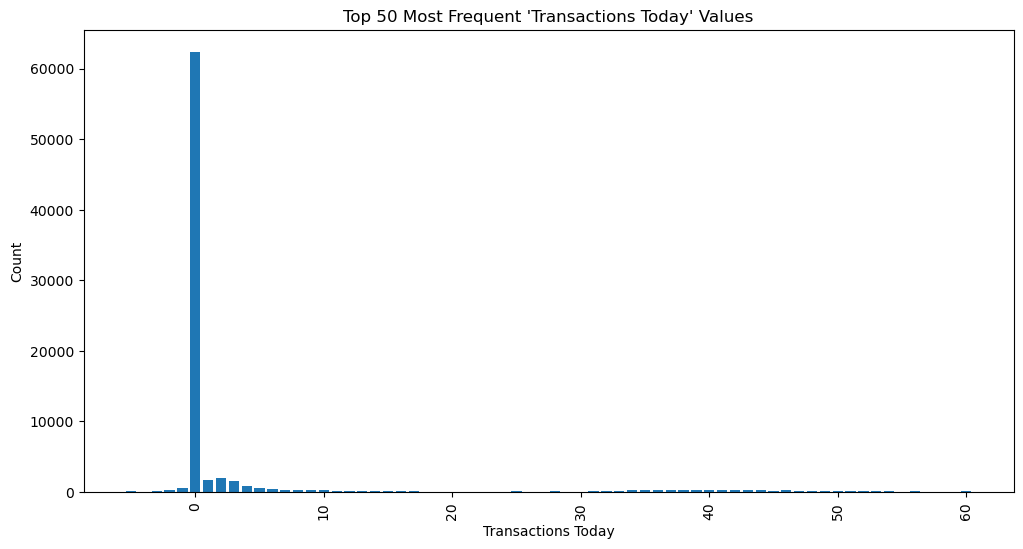

In [ ]:
import matplotlib.pyplot as plt

value_counts = all_data['Transactions Today'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(value_counts.index[:50], value_counts.values[:50])  # Displaying only top 50 to keep it readable

plt.xlabel("Transactions Today")
plt.ylabel("Count")
plt.title("Top 50 Most Frequent 'Transactions Today' Values")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

### Note:
We can see that 0 days has by far the most observations. Interestingly, the distribution would seem to be somewhat symmetrical around 2 if we excluded 0. Also, a good portion of these are still negative.

In [ ]:
negative_transactions = all_data[all_data['Transactions Today'] < 0]
negative_transactions.head(10)

,Record Date,Transaction Type,Security Marketability,Security Type,Security Type Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2024-01-05,Issues,Marketable,Bills,Regular Series,-4,368852,5472231,IIIA,Public Debt Transactions,1,2024,2,2024,1,1,5
4,2024-01-05,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-131,-597,12651,IIIA,Public Debt Transactions,5,2024,2,2024,1,1,5
25,2024-01-04,Issues,Marketable,Notes,NaN,-3,154992,972506,IIIA,Public Debt Transactions,3,2024,2,2024,1,1,4
26,2024-01-04,Issues,Marketable,Bonds,NaN,-1,12997,120624,IIIA,Public Debt Transactions,4,2024,2,2024,1,1,4
27,2024-01-04,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-130,-466,12782,IIIA,Public Debt Transactions,5,2024,2,2024,1,1,4
46,2024-01-03,Issues,Marketable,Bills,Regular Series,-7,217096,5320475,IIIA,Public Debt Transactions,1,2024,2,2024,1,1,3
48,2024-01-03,Issues,Marketable,Notes,NaN,-4,154994,972509,IIIA,Public Debt Transactions,3,2024,2,2024,1,1,3
49,2024-01-03,Issues,Marketable,Bonds,NaN,-1,12998,120625,IIIA,Public Debt Transactions,4,2024,2,2024,1,1,3
50,2024-01-03,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-132,-336,12912,IIIA,Public Debt Transactions,5,2024,2,2024,1,1,3
73,2024-01-02,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-204,-204,13044,IIIA,Public Debt Transactions,5,2024,2,2024,1,1,2


### Note:
It could be that the negative values for Transaction Today are adjustments because previous days were wrong. In the following lines, we check consecutive days to see if there is an obvious trend going on.

In [ ]:
all_data[all_data['Record Date'] == '2007-10-15'] #Monday

,Record Date,Transaction Type,Security Marketability,Security Type,Security Type Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
100821,2007-10-15,Issues,Marketable,Bills,Regular Series,-1,110315,110315,III-A,Public Debt Transactions,1,2008,1,2007,4,10,15
100822,2007-10-15,Issues,Marketable,Bills,Cash Management Series,0,0,0,III-A,Public Debt Transactions,2,2008,1,2007,4,10,15
100823,2007-10-15,Issues,Marketable,Notes,NaN,6000,43861,43861,III-A,Public Debt Transactions,3,2008,1,2007,4,10,15
100824,2007-10-15,Issues,Marketable,Bonds,NaN,0,0,0,III-A,Public Debt Transactions,4,2008,1,2007,4,10,15
100825,2007-10-15,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-55,-364,-364,III-A,Public Debt Transactions,5,2008,1,2007,4,10,15
100826,2007-10-15,Issues,Marketable,Federal Financing Bank,NaN,0,0,0,III-A,Public Debt Transactions,6,2008,1,2007,4,10,15
100827,2007-10-15,Issues,Nonmarketable,United States Savings Securities,Cash Issue Price,10,128,128,III-A,Public Debt Transactions,7,2008,1,2007,4,10,15
100828,2007-10-15,Issues,Nonmarketable,United States Savings Securities,Interest Increment,0,673,673,III-A,Public Debt Transactions,8,2008,1,2007,4,10,15
100829,2007-10-15,Issues,Nonmarketable,Government Account Series,NaN,139667,1448971,1448971,III-A,Public Debt Transactions,9,2008,1,2007,4,10,15
100830,2007-10-15,Issues,Nonmarketable,Domestic Series,NaN,0,247,247,III-A,Public Debt Transactions,10,2008,1,2007,4,10,15


In [ ]:
all_data[all_data['Record Date'] == '2007-10-12'] #Friday

,Record Date,Transaction Type,Security Marketability,Security Type,Security Type Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
100844,2007-10-12,Issues,Marketable,Bills,Regular Series,-1,110316,110316,III-A,Public Debt Transactions,1,2008,1,2007,4,10,12
100845,2007-10-12,Issues,Marketable,Bills,Cash Management Series,0,0,0,III-A,Public Debt Transactions,2,2008,1,2007,4,10,12
100846,2007-10-12,Issues,Marketable,Notes,NaN,0,37861,37861,III-A,Public Debt Transactions,3,2008,1,2007,4,10,12
100847,2007-10-12,Issues,Marketable,Bonds,NaN,0,0,0,III-A,Public Debt Transactions,4,2008,1,2007,4,10,12
100848,2007-10-12,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-27,-309,-309,III-A,Public Debt Transactions,5,2008,1,2007,4,10,12
100849,2007-10-12,Issues,Marketable,Federal Financing Bank,NaN,0,0,0,III-A,Public Debt Transactions,6,2008,1,2007,4,10,12
100850,2007-10-12,Issues,Nonmarketable,United States Savings Securities,Cash Issue Price,8,118,118,III-A,Public Debt Transactions,7,2008,1,2007,4,10,12
100851,2007-10-12,Issues,Nonmarketable,United States Savings Securities,Interest Increment,0,673,673,III-A,Public Debt Transactions,8,2008,1,2007,4,10,12
100852,2007-10-12,Issues,Nonmarketable,Government Account Series,NaN,136149,1309304,1309304,III-A,Public Debt Transactions,9,2008,1,2007,4,10,12
100853,2007-10-12,Issues,Nonmarketable,Domestic Series,NaN,247,247,247,III-A,Public Debt Transactions,10,2008,1,2007,4,10,12


In [ ]:
negative_issues_fytd = all_data[(all_data['Transactions Fiscal Year to Date'] < 0) & (all_data['Transaction Type'] == 'Issues')]

In [ ]:
negative_issues_fytd

,Record Date,Transaction Type,Security Marketability,Security Type,Security Type Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
1496,2023-10-02,Issues,Marketable,Bills,Regular Series,-7,-7,-7,IIIA,Public Debt Transactions,1,2024,1,2023,4,10,2
6697,2022-11-04,Issues,Marketable,Inflation-Protected Securities Increment,NaN,132,377,-263,IIIA,Public Debt Transactions,5,2023,1,2022,4,11,4
6720,2022-11-03,Issues,Marketable,Inflation-Protected Securities Increment,NaN,133,245,-395,IIIA,Public Debt Transactions,5,2023,1,2022,4,11,3
6743,2022-11-02,Issues,Marketable,Inflation-Protected Securities Increment,NaN,132,112,-528,IIIA,Public Debt Transactions,5,2023,1,2022,4,11,2
6767,2022-11-01,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-20,-20,-660,IIIA,Public Debt Transactions,5,2023,1,2022,4,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106002,2006-11-21,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-69,-1329,-201,III-A,Public Debt Transactions,5,2007,1,2006,4,11,21
106025,2006-11-20,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-203,-1261,-132,III-A,Public Debt Transactions,5,2007,1,2006,4,11,20
106757,2006-10-04,Issues,Marketable,Bills,Regular Series,0,-4,-4,III-A,Public Debt Transactions,1,2007,1,2006,4,10,4
106780,2006-10-03,Issues,Marketable,Bills,Regular Series,0,-4,-4,III-A,Public Debt Transactions,1,2007,1,2006,4,10,3


In [ ]:
negative_fytd_counts = all_data[all_data['Transactions Today'] < 0]['Transaction Type'].value_counts()
print(negative_fytd_counts)


Transaction Type
Issues         2579
Redemptions       2
Name: count, dtype: int64


In [ ]:
all_data[all_data['Transactions Today'] < 0].describe()

,Record Date,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
count,2581,2581.000000,2.581000e+03,2.581000e+03,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000
mean,2015-03-13 08:14:52.677256704,-48.951569,1.511319e+05,1.762766e+06,3.024797,2014.994963,2.319644,2014.707478,2.469585,6.415730,14.788842
min,2006-03-01 00:00:00,-1221.000000,-9.733000e+03,-2.238300e+04,1.000000,2006.000000,1.000000,2006.000000,1.000000,1.000000,1.000000
25%,2010-02-17 00:00:00,-53.000000,-4.330000e+02,2.634000e+03,1.000000,2010.000000,1.000000,2010.000000,1.000000,2.000000,7.000000
50%,2015-02-02 00:00:00,-6.000000,-1.000000e+00,2.836510e+05,3.000000,2015.000000,2.000000,2015.000000,3.000000,7.000000,15.000000
75%,2019-10-30 00:00:00,-2.000000,2.247020e+05,2.639523e+06,5.000000,2020.000000,3.000000,2019.000000,4.000000,10.000000,22.000000
max,2024-01-05 00:00:00,-1.000000,1.609076e+06,1.494409e+07,20.000000,2024.000000,4.000000,2024.000000,4.000000,12.000000,31.000000
std,NaN,104.994092,2.507532e+05,2.700490e+06,1.948008,5.445606,1.109734,5.461995,1.214075,3.864413,8.956179


### Note:
In conclusion, we believe that the negative Transaction Amounts for certain days are adjustments made ex post to correct previous entries rather than reflecting actual cash flows. Rather than excluding these adjustments, we will retain them in our analysis to ensure a complete representation of all recorded transactions. Removing them could distort our understanding of net issuance dynamics, as these corrections may capture essential reconciliations that impact overall trends. Given the importance of accurate net issuance estimates for government policymakers in forecasting liquidity needs and managing fiscal policy, maintaining these adjustments ensures a more reliable foundation for decision-making.

## Exploring Our Data Types and Features

In [ ]:
all_data.dtypes

Record Date                         datetime64[ns]
Transaction Type                            object
Security Marketability                      object
Security Type                               object
Security Type Description                   object
Transactions Today                           int64
Transactions Month to Date                   int64
Transactions Fiscal Year to Date             int64
Table Number                                object
Table Name                                  object
Source Line Number                           int64
Fiscal Year                                  int64
Fiscal Quarter Number                        int64
Calendar Year                                int64
Calendar Quarter Number                      int64
Calendar Month Number                        int64
Calendar Day Number                          int64
dtype: object

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110276 entries, 0 to 110275
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Record Date                       110276 non-null  datetime64[ns]
 1   Transaction Type                  110276 non-null  object        
 2   Security Marketability            110276 non-null  object        
 3   Security Type                     110276 non-null  object        
 4   Security Type Description         17952 non-null   object        
 5   Transactions Today                110276 non-null  int64         
 6   Transactions Month to Date        110276 non-null  int64         
 7   Transactions Fiscal Year to Date  110276 non-null  int64         
 8   Table Number                      110276 non-null  object        
 9   Table Name                        110276 non-null  object        
 10  Source Line Number              

### For accuracy and tidiness:

We adjust data types and remove partial years from our data set as we will be grouping by year in the future.

In [ ]:
transaction_type_trend = all_data.groupby(["Calendar Year", "Transaction Type"]).size().unstack()

In [ ]:
all_data.tail()

,Record Date,Transaction Type,Security Marketability,Security Type,Security Type Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
110271,2006-03-01,Redemptions,Nonmarketable,Government Account Series,NaN,100369,100369,13158108,III-A,Public Debt Transactions,20,2006,2,2006,1,3,1
110272,2006-03-01,Redemptions,Nonmarketable,Domestic Series,NaN,0,0,102,III-A,Public Debt Transactions,21,2006,2,2006,1,3,1
110273,2006-03-01,Redemptions,Nonmarketable,Foreign Series,NaN,200,200,500,III-A,Public Debt Transactions,22,2006,2,2006,1,3,1
110274,2006-03-01,Redemptions,Nonmarketable,State and Local Series,NaN,1948,1948,31007,III-A,Public Debt Transactions,23,2006,2,2006,1,3,1
110275,2006-03-01,Redemptions,Nonmarketable,Other,NaN,12,12,1046,III-A,Public Debt Transactions,24,2006,2,2006,1,3,1


## Part 2.1 - Analysis and Insight From SQL Queries

As part of our initial EDA and primary analysis, we leverage SQL tools in Snowflake to run relevant queries. The queries were used to join economic data including aggregating average values and matching to less frequently measured variables as well as adding these key indicators to our primary dataset. All queries are included in the .sql file included in our submission packet but we will note a few key findings here that informed our direction moving forward.

We use a window function and a group by to sum and rank transaction amounts by security type - finding that government account series securities (which are nonmarketable intragovernmental loans) account for the greatest amount of transaction balance throughout the data.

As changes over time are very important in this analysis - because of their relevance for decision maker learning - we also use a query to group by security type and year and find the year/type combinations that had the greatest amount of transactions, suspecting it would be the government account series we do in fact find that to be true and see that transactions in the last three years (in order 2024, 2022, then 2023) are the highest transaction amount years.

And finally, as an early piece of our connection between economic health and treasury activity we use uncorrelated subqueries to sum and rank transaction amounts in months that meet economic indicator conditions to see if the type or magnitude of security issuance is impacted by macroeconomic indicators. In the ranking of securities during times of economic downturn (higher than average unemployment and lower than average interest rates) we do see that intragovernment lending decreases slightly in ratio with the other securities and bonds become relatively more active in the ranking.

All of these findings help inform the direction of this work - and we continously updated the queries as we worked through this notebook to explore the data and guide our analysis and model building process.

---
# Part 3 - Initial Visualization


### Trends over time:

In [ ]:
transaction_type_trend = all_data.groupby(["Calendar Year", "Transaction Type"]).size().unstack()

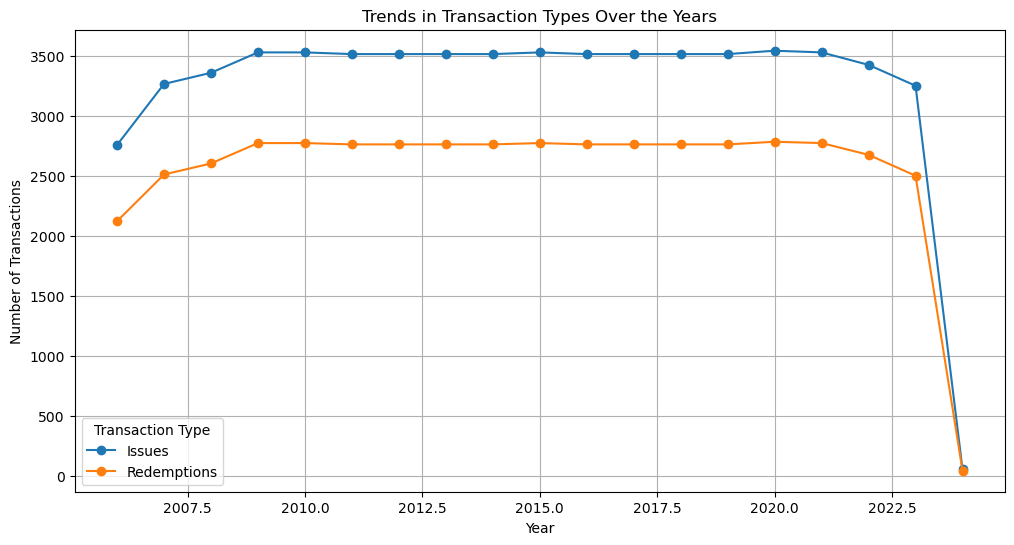

In [ ]:
transaction_type_trend.plot(kind="line", figsize=(12, 6), marker="o")
plt.title("Trends in Transaction Types Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.legend(title="Transaction Type")
plt.grid(True)
plt.show()

### Trends from 2006-2023 by security type:

In [ ]:
security_type_trend = all_data.groupby(["Calendar Year", "Security Type"]).size().unstack()


In [ ]:
bins = list(range(2006, 2025, 1))

labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]

all_data["Year Group"] = pd.cut(all_data["Calendar Year"], bins=bins, labels=labels, right=False)


In [ ]:
security_type_trend_grouped = all_data.groupby(["Year Group", "Security Type"], observed=False).size().unstack()

In [ ]:
all_data["Year Group"].value_counts()

Year Group
2020-2020    6325
2009-2009    6300
2021-2021    6300
2010-2010    6300
2015-2015    6300
2014-2014    6275
2019-2019    6275
2012-2012    6275
2013-2013    6275
2011-2011    6275
2018-2018    6275
2017-2017    6275
2016-2016    6275
2022-2022    6098
2008-2008    5960
2007-2007    5775
2023-2023    5750
2006-2006    4876
Name: count, dtype: int64

In [ ]:
security_type_trend_grouped = all_data.groupby(["Year Group", "Security Type"], observed=False).size().unstack()

In [ ]:
security_type_trend_grouped.head(19)

Security Type,Bills,Bonds,Domestic Series,Federal Financing Bank,Foreign Series,Government Account Series,Hope Bonds,Inflation-Protected Securities Increment,Notes,Other,State and Local Series,United States Savings Securities
Year Group,,,,,,,,,,,,
2006-2006,636,424,424,424,424,424,0,212,424,424,424,636
2007-2007,753,502,503,502,503,502,0,251,502,502,502,753
2008-2008,756,504,504,504,504,504,164,252,504,504,504,756
2009-2009,756,504,504,504,504,504,504,252,504,504,504,756
2010-2010,756,504,504,504,504,504,504,252,504,504,504,756
2011-2011,753,502,502,502,502,502,502,251,502,502,502,753
2012-2012,753,502,502,502,502,502,502,251,502,502,502,753
2013-2013,753,502,502,502,502,502,502,251,502,502,502,753
2014-2014,753,502,502,502,502,502,502,251,502,502,502,753


### Note:
We do not need to normalize or scale this dataset because the transaction amounts for all security types are already on a similar scale, with values in the same order of magnitude. Normalization is typically necessary when variables have vastly different ranges, which is not the case here. Since standard regression models do not require scaling unless using distance-based methods, the data can be used as-is for analysis. Later, we do normalize in order to perform a logistic regression.

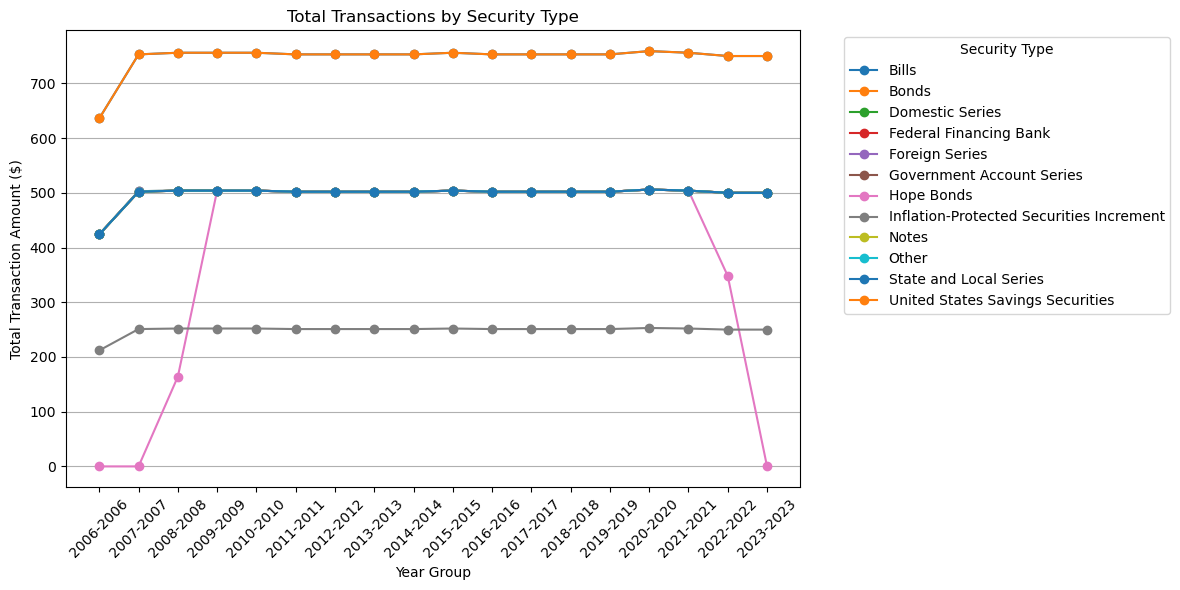

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Manually plot each security type to ensure none are ignored
for col in security_type_trend_grouped.columns:
    ax.plot(security_type_trend_grouped.index, security_type_trend_grouped[col], marker="o", label=col)

# Title & labels
ax.set_title("Total Transactions by Security Type")
ax.set_xlabel("Year Group")
ax.set_ylabel("Total Transaction Amount ($)")
ax.set_xticks(range(len(security_type_trend_grouped.index)))
ax.set_xticklabels(security_type_trend_grouped.index, rotation=45)

# Move legend outside the plot
ax.legend(title="Security Type", loc="upper left", bbox_to_anchor=(1.05, 1.0))

# Grid lines for better visibility
plt.grid(axis="y")

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


### Note
Hope Bonds saw a sharp rise after 2008, likely due to policy responses to the financial crisis, followed by a steep decline post-2021 as support measures ended. Understanding these shifts helps policymakers assess the long-term impact of fiscal interventions and adjust strategies for future economic stability.

## Part 3.1 - CPI Data Import

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services (where the base of 100 is 1982-1984 prices). This value is often used to measure inflation and is a primary metric used to track buying power in the United States.

In [ ]:
 # Importing new .csv file with Consumer Price Index data over the same time period - got it from FRED.
CPI_data = pd.read_csv("CPIAUCSL.csv")

In [ ]:
CPI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  217 non-null    object 
 1   CPIAUCSL          217 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
CPI_data.describe()

,CPIAUCSL
count,217.000000
mean,241.262106
std,27.729379
min,199.300000
25%,218.690000
50%,237.231000
75%,255.802000
max,309.794000


In [ ]:
# Rename
all_data.rename(columns={'Record Date': 'Date'}, inplace=True)
CPI_data.rename(columns={'observation_date': 'Date'}, inplace=True)

### Merging CPI and Treasury Data:

In [ ]:
# To 'datetime' and merge
all_data['Date'] = pd.to_datetime(all_data['Date'])
CPI_data['Date'] = pd.to_datetime(CPI_data['Date'])

merged_df = pd.merge(all_data, CPI_data, on='Date', how='left')

In [ ]:
transaction_type_trend = all_data.groupby(["Calendar Year", "Transaction Type"]).size().unstack()

In [ ]:
merged_df.info()

# Our CPIAUCL (CPI data) is monthly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110276 entries, 0 to 110275
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Date                              110276 non-null  datetime64[ns]
 1   Transaction Type                  110276 non-null  object        
 2   Security Marketability            110276 non-null  object        
 3   Security Type                     110276 non-null  object        
 4   Security Type Description         17952 non-null   object        
 5   Transactions Today                110276 non-null  int64         
 6   Transactions Month to Date        110276 non-null  int64         
 7   Transactions Fiscal Year to Date  110276 non-null  int64         
 8   Table Number                      110276 non-null  object        
 9   Table Name                        110276 non-null  object        
 10  Source Line Number              

In [ ]:
cpi_yearly = (merged_df.groupby("Calendar Year")["CPIAUCSL"].mean())

## Plotting with CPI Data

Using average annual values of monthly CPI records:

In [ ]:
combined_df = transaction_type_trend.join(cpi_yearly)

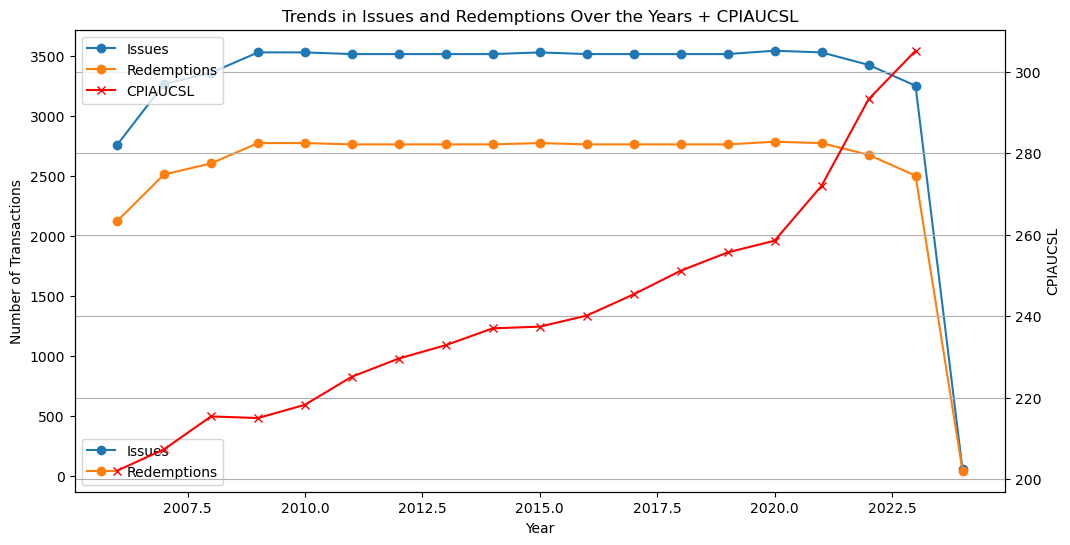

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the transaction counts (Issues/Redemptions) on the left y-axis
combined_df[["Issues", "Redemptions"]].plot(ax=ax, marker="o")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Transactions")

# Create a second (right) y-axis
ax2 = ax.twinx()

# Plot the yearly CPI on the right y-axis
combined_df["CPIAUCSL"].plot(ax=ax2, color="red", marker="x", label="CPIAUCSL")
ax2.set_ylabel("CPIAUCSL")

# Combine legends so both appear in a single box
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.title("Trends in Issues and Redemptions Over the Years + CPIAUCSL")
plt.grid(True)
plt.show()

### Initial Interpretation:

From 2006 to around 2020, Treasury issues remain higher than redemptions and CPI rises steadily, reflecting the post-2008 crisis recovery and moderate expansions. Post‑2020, large‑scale fiscal stimulus—such as the CARES Act and subsequent relief packages—contributed to shifting debt issuance patterns, as outlined by the U.S. Treasury ( https://home.treasury.gov/policy-issues/coronavirus ) and analyzed by the Congressional Budget Office ( https://www.cbo.gov/publication/56517 ). By 2022, transactions plunge sharply even as CPI remained elevated, highlighting the impact of global supply chain disruptions and pandemic‑era fiscal policies on both inflation and Treasury operations.

In [ ]:
merged_df['CPIAUCSL'] = pd.to_numeric(merged_df['CPIAUCSL'], errors='coerce')


## Analysis of seasonality:

The below plots alow us to see seasonal trends in an attempt to identify signal and noise in the data.

In [ ]:
df_for_seasonal = merged_df.copy()
df_for_seasonal['Date'] = pd.to_datetime(df_for_seasonal['Date'], errors='coerce')

# Set 'Date' as the index so resample() works nicely
df_for_seasonal.set_index('Date', inplace=True)

In [ ]:
df_for_seasonal.head()

,Transaction Type,Security Marketability,Security Type,Security Type Description,Transactions Today,Transactions Month to Date,Transactions Fiscal Year to Date,Table Number,Table Name,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,Year Group,CPIAUCSL
Date,,,,,,,,,,,,,,,,,,
2024-01-05,Issues,Marketable,Bills,Regular Series,-4,368852,5472231,IIIA,Public Debt Transactions,1,2024,2,2024,1,1,5,NaN,NaN
2024-01-05,Issues,Marketable,Bills,Cash Management Series,0,70001,1005013,IIIA,Public Debt Transactions,2,2024,2,2024,1,1,5,NaN,NaN
2024-01-05,Issues,Marketable,Notes,NaN,0,154992,972506,IIIA,Public Debt Transactions,3,2024,2,2024,1,1,5,NaN,NaN
2024-01-05,Issues,Marketable,Bonds,NaN,0,12997,120624,IIIA,Public Debt Transactions,4,2024,2,2024,1,1,5,NaN,NaN
2024-01-05,Issues,Marketable,Inflation-Protected Securities Increment,NaN,-131,-597,12651,IIIA,Public Debt Transactions,5,2024,2,2024,1,1,5,NaN,NaN


/tmp/ipykernel_14704/536974899.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum_today = df_for_seasonal['Transactions Today'].resample('M').sum()
/tmp/ipykernel_14704/536974899.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_count = df_for_seasonal.resample('M').size()
/tmp/ipykernel_14704/536974899.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sum_today = df_for_seasonal['Transactions Today'].resample('Q').sum()


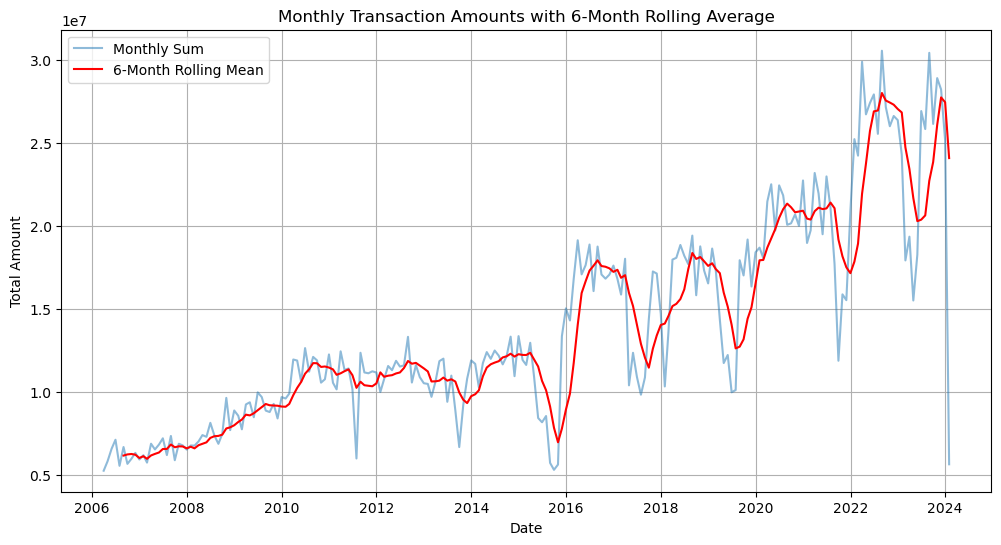

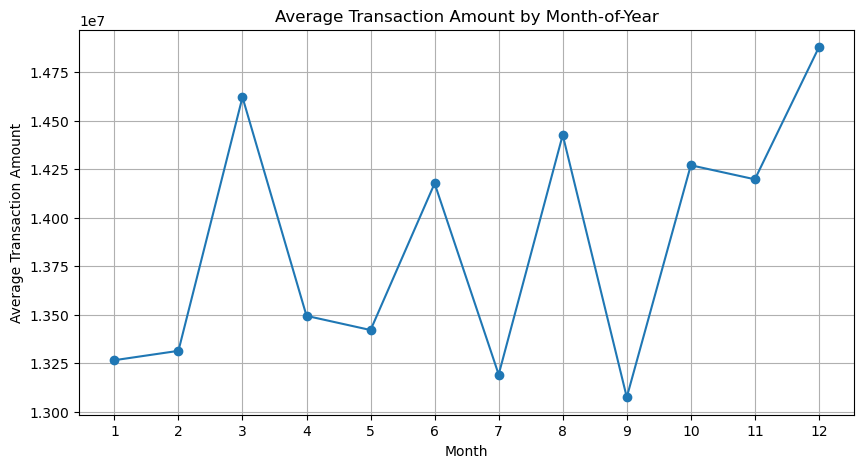

In [ ]:
# Example A: Monthly sum of "transaction_today_amt"
monthly_sum_today = df_for_seasonal['Transactions Today'].resample('M').sum()

# Example B: Monthly count of transactions (e.g., how many rows per month)
monthly_count = df_for_seasonal.resample('M').size()

# Example C: Quarterly sum of "transaction_today_amt"
quarterly_sum_today = df_for_seasonal['Transactions Today'].resample('Q').sum()

# Let's apply a 6-month rolling average to smooth out short-term fluctuations.

rolling_window = 6
monthly_sum_today_rolling = monthly_sum_today.rolling(rolling_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sum_today.index, monthly_sum_today.values, alpha=0.5, label='Monthly Sum')
plt.plot(monthly_sum_today_rolling.index, monthly_sum_today_rolling.values, color='red', label=f'{rolling_window}-Month Rolling Mean')
plt.title(f"Monthly Transaction Amounts with {rolling_window}-Month Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.grid(True)
plt.legend()
plt.show()

# One quick trick is to group by year and month to see average monthly amounts.

df_for_seasonal['Year'] = df_for_seasonal.index.year
df_for_seasonal['Month'] = df_for_seasonal.index.month

# Group by (Year, Month), then take average or sum:
monthly_group = df_for_seasonal.groupby(['Year', 'Month'])['Transactions Today'].sum().reset_index()

# Alternatively, pivot so rows = Year, columns = Month; the cells are transaction sums
month_pivot = monthly_group.pivot(index='Year', columns='Month', values='Transactions Today')

# This can highlight if certain months consistently have higher/lower volumes.

avg_by_month = monthly_group.groupby('Month')['Transactions Today'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_by_month.index, avg_by_month.values, marker='o')
plt.title("Average Transaction Amount by Month-of-Year")
plt.xlabel("Month")
plt.ylabel("Average Transaction Amount")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

### Note:
The graph displays monthly transaction amounts over time, with the blue line representing the raw monthly totals and the red line showing the 6-month rolling average to smooth short-term fluctuations. The data exhibits clear trends and cyclical patterns, with noticeable spikes and dips, suggesting potential seasonality and structural changes in transaction volumes over time. Identifying these trends and cyclical patterns helps policymakers anticipate liquidity needs, assess the impact of fiscal policies, and make informed decisions to ensure financial stability and market efficiency.

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110276 entries, 0 to 110275
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Date                              110276 non-null  datetime64[ns]
 1   Transaction Type                  110276 non-null  object        
 2   Security Marketability            110276 non-null  object        
 3   Security Type                     110276 non-null  object        
 4   Security Type Description         17952 non-null   object        
 5   Transactions Today                110276 non-null  int64         
 6   Transactions Month to Date        110276 non-null  int64         
 7   Transactions Fiscal Year to Date  110276 non-null  int64         
 8   Table Number                      110276 non-null  object        
 9   Table Name                        110276 non-null  object        
 10  Source Line Number              

## Considering Overall Economic Health

In this part of the EDA we add visual elements to indicate key events that may influence both government (Treasury/Fed) and consumer behavior:

/tmp/ipykernel_14704/702166123.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sums = (merged_df.groupby([pd.Grouper(key="Date", freq="M"), "Transaction Type"])["Transactions Today"].sum().unstack(fill_value=0))
/tmp/ipykernel_14704/702166123.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_cpi = merged_df.groupby(pd.Grouper(key="Date", freq="M"))["CPIAUCSL"].mean()


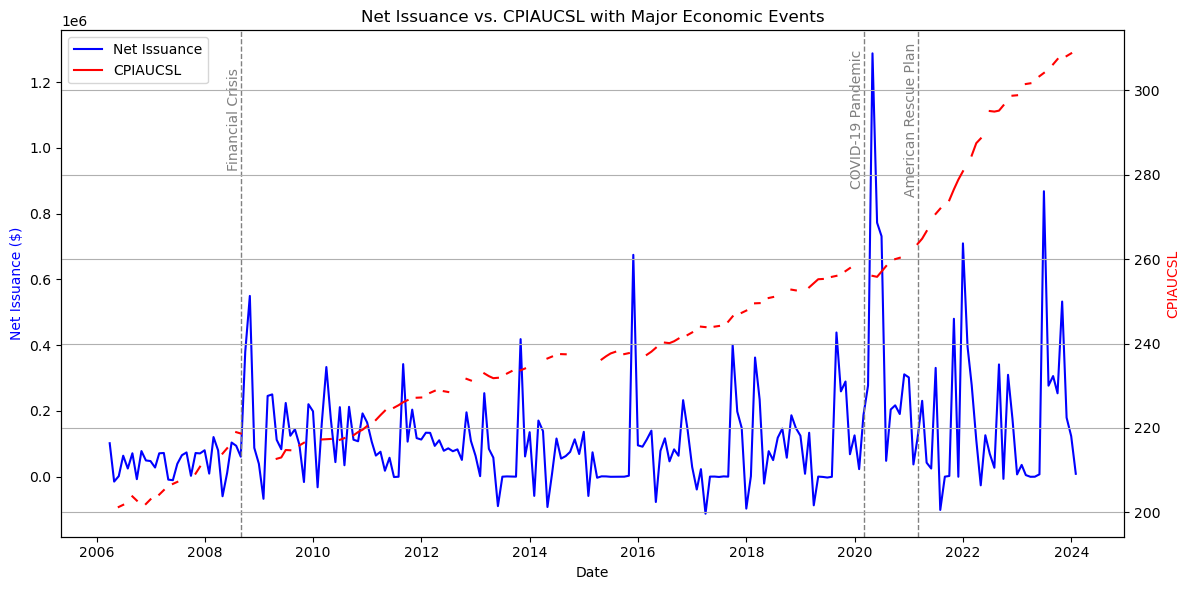

In [ ]:
# Group daily data into monthly sums for each transaction_type
for col in ["Transactions Today", "Transactions Month to Date", "Transactions Fiscal Year to Date"]:
    merged_df[col] = pd.to_numeric(merged_df[col], errors="coerce")

monthly_sums = (merged_df.groupby([pd.Grouper(key="Date", freq="M"), "Transaction Type"])["Transactions Today"].sum().unstack(fill_value=0))

# Compute net issuance: Issues minus Redemptions
monthly_sums["Net_Issuance"] = monthly_sums["Issues"] - monthly_sums["Redemptions"]

# Get monthly CPI by averaging across each month
monthly_cpi = merged_df.groupby(pd.Grouper(key="Date", freq="M"))["CPIAUCSL"].mean()

# Combine Net_Issuance and CPI into one DataFrame for convenience
merged_monthly = pd.DataFrame({
    "Net_Issuance": monthly_sums["Net_Issuance"],
    "CPIAUCSL": monthly_cpi
})

# Plot Net Issuance (left y-axis) vs. CPI (right y-axis)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Net Issuance on the left axis
ax.plot(merged_monthly.index, merged_monthly["Net_Issuance"], label="Net Issuance", color="blue")
ax.set_xlabel("Date")
ax.set_ylabel("Net Issuance ($)", color="blue")

# Create a second y-axis for CPI
ax2 = ax.twinx()
ax2.plot(merged_monthly.index, merged_monthly["CPIAUCSL"], label="CPIAUCSL", color="red")
ax2.set_ylabel("CPIAUCSL", color="red")

# 7) Annotate major economic events
major_events = {
    "2008-09": "Financial Crisis",
    "2020-03": "COVID-19 Pandemic",
    "2021-03": "American Rescue Plan"
}

for date_str, label in major_events.items():
    event_date = pd.to_datetime(date_str)
    # Vertical line
    ax.axvline(event_date, color="gray", linestyle="--", linewidth=1)
    # Add text label slightly above the line
    ax.text(
        event_date,
        ax.get_ylim()[1] * 0.8,  # 80% up the axis height
        label,
        rotation=90,
        color="gray",
        ha="right",
        va="center"
    )

# 8) Combine legends (one from each axis)
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title("Net Issuance vs. CPIAUCSL with Major Economic Events")
plt.grid(True)
plt.tight_layout()
plt.show()

### Note:
The graph compares net issuance (blue line) with CPIAUCSL (red dashed line) while marking major economic events, such as the 2008 Financial Crisis, COVID-19 Pandemic, and the American Rescue Plan. It shows that net issuance exhibits high volatility with sharp spikes during economic disruptions, while CPIAUCSL follows a steady upward trend, suggesting a long-term increase in price levels alongside fluctuations in government debt issuance.

### Identifying Security Types of Importance:


/tmp/ipykernel_14704/394535067.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_by_type = (market_type_df.groupby([pd.Grouper(freq='M'), 'Security Type'])['Transactions Today'].sum().unstack(fill_value=0))
/tmp/ipykernel_14704/394535067.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_by_market = (market_type_df.groupby([pd.Grouper(freq='M'), 'Security Marketability'])['Transactions Today'].sum().unstack(fill_value=0))


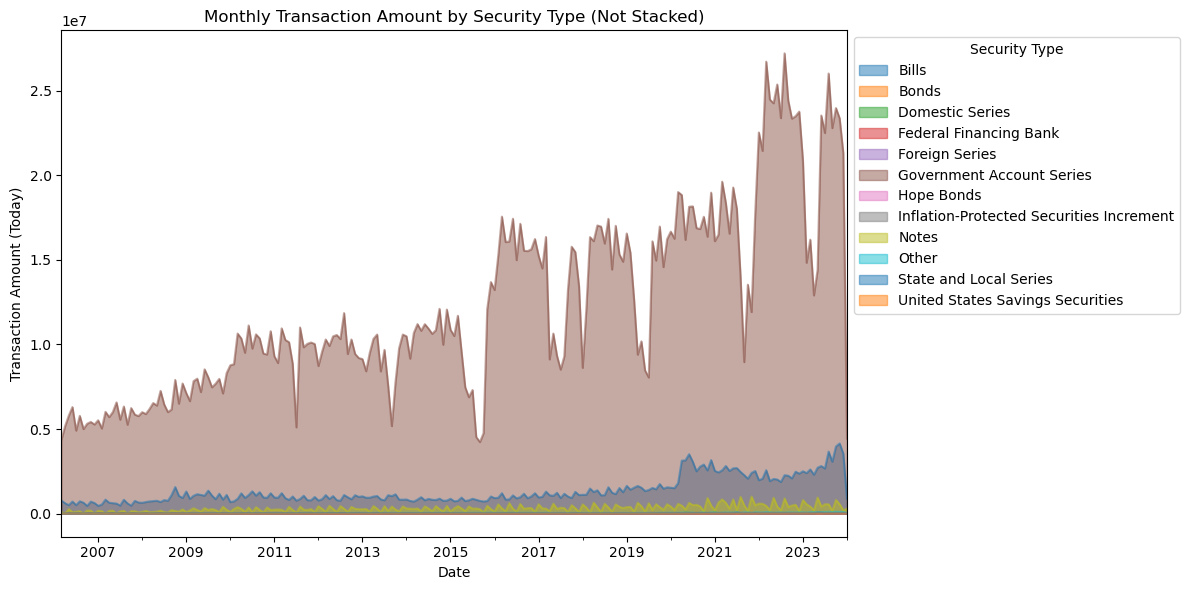

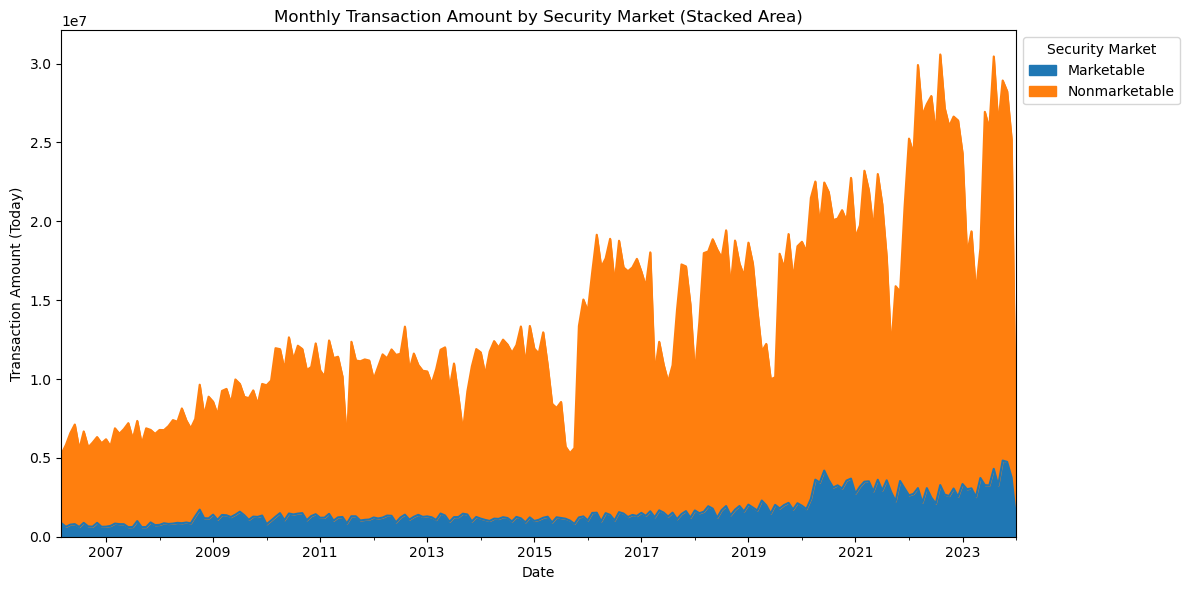

In [ ]:
# Aggregate by month (or year) and create pivot tables
# a) By security_type
# b) By security_market

# Make sure Date is a proper datetime and set it as index for resampling
market_type_df = merged_df.copy()
market_type_df['Date'] = pd.to_datetime(market_type_df['Date'], errors='coerce')
market_type_df.set_index('Date', inplace=True)

# (a) Monthly totals by Security Type
monthly_by_type = (market_type_df.groupby([pd.Grouper(freq='M'), 'Security Type'])['Transactions Today'].sum().unstack(fill_value=0))

# (b) Monthly totals by Security Market
monthly_by_market = (market_type_df.groupby([pd.Grouper(freq='M'), 'Security Marketability'])['Transactions Today'].sum().unstack(fill_value=0))


# Plot stacked area charts

# Stacked Area: Security Types over time
plt.figure(figsize=(12, 6))
monthly_by_type.plot.area(ax=plt.gca(), stacked=False)
plt.title("Monthly Transaction Amount by Security Type (Not Stacked)")
plt.xlabel("Date")
plt.ylabel("Transaction Amount (Today)")
plt.legend(title="Security Type", loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Stacked Area: Security Market over time
plt.figure(figsize=(12, 6))
monthly_by_market.plot.area(ax=plt.gca(), stacked=True)
plt.title("Monthly Transaction Amount by Security Market (Stacked Area)")
plt.xlabel("Date")
plt.ylabel("Transaction Amount (Today)")
plt.legend(title="Security Market", loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Part 4 Model Building

To analyze the factors influencing government debt issuance, we first built a model using Net Issuance as the dependent variable. We structured a new regression dataset, incorporating economic indicators and historical debt issuance data. The goal was to predict whether Net Issuance would increase or decrease using time series analysis with lagged variables to account for past trends in borrowing patterns. This approach allows us to explore how macroeconomic conditions and fiscal policy decisions shape government borrowing behavior over time.

Our model is loosely based on the paper "On the Determination of the Public Debt." Barro (1979) develops a foundational theory of public debt, showing that deficits should be used to stabilize tax rates over time, with debt issuance responding to temporary government spending increases, countercyclical income movements, and expected inflation. Using U.S. data since WWI, he empirically tests this theory with covariates including government spending, income deviations from trend, expected inflation, and interest rates—offering key insights for policymakers on the determinants of debt issuance and the implications for fiscal policy stability.

## Preparing Data for First Model

In [ ]:
monthly_sums_df = (
    merged_df.groupby([pd.Grouper(key="Date", freq="M"), "Transaction Type"])  # Group by month and transaction type
    ["Transactions Today"]  # Select the column to aggregate
    .sum()  # Sum transactions for each group
    .unstack(fill_value=0)  # Pivot "Transaction Type" into separate columns, filling missing values with 0
    .reset_index()  # Ensures "Date" remains a column instead of an index
)


/tmp/ipykernel_14704/223581238.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged_df.groupby([pd.Grouper(key="Date", freq="M"), "Transaction Type"])  # Group by month and transaction type


In [ ]:
all_data = all_data.sort_values(by='Calendar Month Number')

In [ ]:
monthly_sums_df["Net_Issuance"] = monthly_sums_df["Issues"] - monthly_sums_df["Redemptions"] #We created our dependant by taking the difference of the summed montly issuances and redeptions.

In [ ]:
monthly_sums_df.head()

Transaction Type,Date,Issues,Redemptions,Net_Issuance
0,2006-03-31,2674350,2573084,101266
1,2006-04-30,2901596,2917032,-15436
2,2006-05-31,3286024,3284960,1064
3,2006-06-30,3589387,3526123,63264
4,2006-07-31,2783879,2759570,24309


We then created a data frame for regression analysis. We decided on a logistic regression with a binary variable for net issuance as debt issuance decisions are often driven by directional trends rather than exact amounts. We generated a binary variable named "Target", which indicates whether Net Issuance increased or decreased compared to the previous month. This was done by calculating the difference in Net Issuance from the prior month and converting the result into a boolean series, where an increase is represented by 1 and a decrease by 0.

In [ ]:
df_reg = monthly_sums_df [['Net_Issuance','Date']] #Creating our regression data frame

In [ ]:
df_reg["Target"] = (df_reg["Net_Issuance"].diff() > 0).astype(int) #Creating a Binary Variable for net issuance increase or decrease

/tmp/ipykernel_14704/930302706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg["Target"] = (df_reg["Net_Issuance"].diff() > 0).astype(int) #Creating a Binary Variable for net issuance increase or decrease


In [ ]:
df_reg.head()

Transaction Type,Net_Issuance,Date,Target
0,101266,2006-03-31,0
1,-15436,2006-04-30,0
2,1064,2006-05-31,1
3,63264,2006-06-30,1
4,24309,2006-07-31,0


### Note:

We then continued to build out our regression framework by including CPI data as an explanatory variable for Net Issuance. We included CPI because inflation influences government borrowing costs, fiscal policy decisions, and investor demand for securities. By analyzing CPI alongside Net Issuance, we aim to capture how inflationary pressures affect debt issuance trends, helping to explain whether higher inflation leads to increased borrowing needs or shifts in debt strategies.

In [ ]:
CPI_data["obs_date"] = pd.to_datetime(CPI_data["Date"])# We convert the "Date" column to datetime format for easier manipulation

In [ ]:
CPI_data["Month"] = CPI_data["obs_date"].dt.to_period("M") # We extract only the year and month
CPI_data= CPI_data.rename(columns={"CPIAUCSL": "CPI"})

In [ ]:
df_reg["Month"] = df_reg["Date"].dt.to_period("M") #Ensuring that the regression data frame is formatted the same way as the CPI data

In [ ]:
# We merge CPI data into the regression dataframe based on the "Month" column
df_reg = df_reg.merge(CPI_data[["Month", "CPI"]], on="Month", how="left").drop(columns=["Month"])

In [ ]:
df_reg.head(20)

,Net_Issuance,Date,Target,CPI
0,101266,2006-03-31,0,199.700
1,-15436,2006-04-30,0,200.700
2,1064,2006-05-31,1,201.300
3,63264,2006-06-30,1,201.800
4,24309,2006-07-31,0,202.900
5,70687,2006-08-31,1,203.800
6,-8064,2006-09-30,0,202.800
7,77357,2006-10-31,1,201.900
8,48913,2006-11-30,0,202.000
9,46980,2006-12-31,0,203.100


In [ ]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

We incorporated 30-year mortgage rate data into our regression as it serves as a key indicator of long-term borrowing costs and Treasury yield trends, both of which influence government debt issuance decisions. Additionally, we included the unemployment rate as an explanatory variable, as it reflects overall economic conditions and can drive fiscal policy responses, such as increased debt issuance during periods of high unemployment.

In [ ]:
Mortgage_df= pd.read_csv('MORTGAGE30US.csv')

In [ ]:
Unrate_df = pd.read_csv('UNRATE (1).csv')

In [ ]:
# Converte the "observation_date" column to datetime format for time-series analysis
Mortgage_df["observation_date"] = pd.to_datetime(Mortgage_df["observation_date"])

In [ ]:
# Extracting only month and year to match formatting of regression data frame
Mortgage_df["Month"] = Mortgage_df["observation_date"].dt.to_period("M")

In [ ]:
# We aggregate mortgage rates by month and then compute the mean for each month
Mortgage_monthly = Mortgage_df.groupby("Month")["MORTGAGE30US"].mean().reset_index()

In [ ]:
df_reg["Month"] = df_reg["Date"].dt.to_period("M")

In [ ]:
df_reg.head()

,Net_Issuance,Date,Target,CPI,Month
0,101266,2006-03-31,0,199.7,2006-03
1,-15436,2006-04-30,0,200.7,2006-04
2,1064,2006-05-31,1,201.3,2006-05
3,63264,2006-06-30,1,201.8,2006-06
4,24309,2006-07-31,0,202.9,2006-07


In [ ]:
# We merge the mortgage rate data into the regression dataframe based on the "Month" column
df_reg = df_reg.merge(Mortgage_monthly, on="Month", how="left")

In [ ]:
#This sequence of manipulating columns and merging is the same process as the mortgage data fram above.
Unrate_df["observation_date"] = pd.to_datetime(Unrate_df["observation_date"])
Unrate_df.head()

,observation_date,UNRATE
0,2006-01-01,4.7
1,2006-02-01,4.8
2,2006-03-01,4.7
3,2006-04-01,4.7
4,2006-05-01,4.6


In [ ]:
Unrate_df["Month"] = Unrate_df["observation_date"].dt.to_period("M")

In [ ]:
df_reg = df_reg.merge(Unrate_df, on="Month", how="left")

In [ ]:
df_reg.head()

,Net_Issuance,Date,Target,CPI,Month,MORTGAGE30US,observation_date,UNRATE
0,101266,2006-03-31,0,199.7,2006-03,6.3240,2006-03-01,4.7
1,-15436,2006-04-30,0,200.7,2006-04,6.5075,2006-04-01,4.7
2,1064,2006-05-31,1,201.3,2006-05,6.5975,2006-05-01,4.6
3,63264,2006-06-30,1,201.8,2006-06,6.6820,2006-06-01,4.6
4,24309,2006-07-31,0,202.9,2006-07,6.7625,2006-07-01,4.7


In [ ]:
# Renamed columns to improve readability.
df_reg = df_reg.rename(columns={"MORTGAGE30US": "30yr Morgage Rate", "UNRATE": "Unemployment Rate"})
df_reg.head()

,Net_Issuance,Date,Target,CPI,Month,30yr Morgage Rate,observation_date,Unemployment Rate
0,101266,2006-03-31,0,199.7,2006-03,6.3240,2006-03-01,4.7
1,-15436,2006-04-30,0,200.7,2006-04,6.5075,2006-04-01,4.7
2,1064,2006-05-31,1,201.3,2006-05,6.5975,2006-05-01,4.6
3,63264,2006-06-30,1,201.8,2006-06,6.6820,2006-06-01,4.6
4,24309,2006-07-31,0,202.9,2006-07,6.7625,2006-07-01,4.7


In [ ]:
# The regression data frame had repeat month columns so I removed redundancies.
df_reg = df_reg.drop(columns=["observation_date", "Month"])

###  Note:

After a few inaccurate models which can be found in the appendix, we decided to incorporate one and two month lagged Net Issuance variables to better capture the patterns and decision-making processes behind government borrowing. Debt issuance often follows multi-month strategies shaped by fiscal policy, interest rates, and broader economic conditions. By considering past issuance levels, we hope to better understand how historical borrowing trends influence future decisions.

We included lagged Net Issuance because past issuance levels often influence future borrowing decisions.The 30-Year Mortgage Rate was included as it reflects long-term borrowing costs and investor demand for government securities, both of which can impact issuance decisions. Unemployment Rate was selected as economic downturns often lead to increased borrowing for fiscal stimulus. These factors together help determine the likelihood of Net Issuance increasing or decreasing over time.

We felt justified in selecting our dependents following research into U.S public debt. In his study of U.S Public Debt, Robert Barro found that a "long-term interest-rate variable proxies satisfactorily for expected inflation". Additionally Barro used lagged values for unemployment rate to help analyze government borrowing in his study.

In [ ]:
df_reg["Net_Issuance_1M_Ago"] = df_reg["Net_Issuance"].shift(1)  # 1 month before
df_reg["Net_Issuance_2M_Ago"] = df_reg["Net_Issuance"].shift(2)  # 2 months befoer

In [ ]:
# Here we use the .apply() function to convert our CPI to a monthly % change
df_reg["CPI_Percent_Change"] = df_reg["CPI"].pct_change().apply(lambda x: x * 100)

The

In [ ]:
df_reg = df_reg.dropna() #Dropped any null values to avoid errors when running the model

### Model 1: Logistic Refression for Predicting Net Issuance Direction

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define Features (X) and Target (y)
X = df_reg[["CPI_Percent_Change", "Net_Issuance_1M_Ago", "Net_Issuance_2M_Ago", "30yr Morgage Rate", "Unemployment Rate"]]
y = df_reg["Target"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (IMPORTANT)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data

# Train Logistic Regression Model with higher max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# coefficients
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
print(coefficients)

Model Accuracy: 0.8140
Confusion Matrix:
 [[20  3]
 [ 5 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.83      0.75      0.79        20

    accuracy                           0.81        43
   macro avg       0.82      0.81      0.81        43
weighted avg       0.82      0.81      0.81        43

   CPI_Percent_Change  Net_Issuance_1M_Ago  Net_Issuance_2M_Ago  \
0            0.174313            -1.803338             0.189255   

   30yr Morgage Rate  Unemployment Rate  
0          -0.102814           0.118164  


## Results

Our model had an accuracy of 81.40%, a fairly strong performance in predicting whether Net Issuance increased or decreased. The confusion matrix shows that the model correctly classified 20 instances of no increase and 14 instances of an increase, the model tended to be inaccurate most regarding false negatives, with false negatives being twice as common as false positives.
The F1-score of 0.79 suggests a good balance between precision and recall. While the model performs well, its slightly lower recall for increases implies that it occasionally underestimates when Net Issuance will rise.

We then decided to build a linear regression model to predict CPI based on a series of independent variables. We included lagged Net Issuance (1M Ago & 2M Ago) because government borrowing can contribute to inflation by increasing money supply and government spending. Net Issuance Percentage Change was added to capture the rate at which borrowing is expanding or contracting, which could influence the magnitude of inflationary trends. The 30-Year Mortgage Rate was included as it reflects long-term interest rates, which are closely tied to inflation expectations. Unemployment Rate was selected because labor market conditions influence consumer demand and wage growth, both of which can drive inflation. Together, these variables help explain how government borrowing, interest rates, and economic activity interact to impact CPI.

In [ ]:
# We Multiply by 100 to convert the value into a percentage format for easier interpretation
df_reg["Net_Issuance_Pct_Change"] = df_reg["Net_Issuance"].pct_change() * 100

In [ ]:
df_reg = df_reg.dropna(subset=["Net_Issuance_Pct_Change"]) #Dropping null values to avoid any errors while running the model

### Model Two: Predicting CPI Trends Using Treasury Issuance and Macroeconomic Indicators

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define Features (X) and Target (y)
X = df_reg[["Net_Issuance_1M_Ago", "Net_Issuance_2M_Ago", "30yr Morgage Rate", "Unemployment Rate","Net_Issuance_Pct_Change",'Net_Issuance']]
y = df_reg["CPI"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")  # Measures how well the model explains variance

# coefficients
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
print(coefficients)

Mean Squared Error: 496.93
R-squared (R²): 0.3819
                         Coefficient
Net_Issuance_1M_Ago         3.771210
Net_Issuance_2M_Ago         5.512780
30yr Morgage Rate          -4.884506
Unemployment Rate         -16.758818
Net_Issuance_Pct_Change     0.928390
Net_Issuance                6.964688


## Results

Our linear regression model achieved an R² of 0.3819, meaning it explains approximately 38.19% of the variance in CPI based on our independent variables. While the model captures some meaningful relationships, a large portion of CPI variability remains unexplained, suggesting that additional factors, such as energy prices, money supply, or fiscal policy shocks, may play a significant role. Future additions to the model could include more macroeconomic factors or a non-linear regression model.

# Part 5 - Conclusion

This analysis of U.S. Treasury public debt transactions provides valuable insight into how government debt management strategies and borrowing patterns relate to broader macroeconomic trends. Through Treasury security issuance and redemption data, we uncovered seasonal borrowing patterns, fluctuations in investor demand, and shifts in debt financing strategies in response to inflationary pressures.


Our findings show that public debt issuance often responds to to economic conditions and fiscal policy adjustments. The "Net Issuance vs. CPIAUCSL with Major Economic Events" graph best illustrates this relationship. There are clear periods of heightened borrowing that coincide with economic downturns and expansionary fiscal policies, such as the 2008 Financial Crisis and the COVID-19 pandemic. These moments saw sharp and sudden increases in net issuance as the government raised funds for stimulus packages. It is also clear that transaction patterns do not solely depend on large-scale macroeconomic shocks, as the volatility of issuances is constant throughout the data.


The relationship between CPI trends and Treasury debt issuance reveals insights into how government borrowing strategies adapt to inflationary pressures. The "Trends in Issues and Redemptions Over the Years + CPIAUCSL" graph highlights that from 2006 to 2020, Treasury issuances consistently outpaced redemptions, coinciding with a steady rise in CPI. This is representative of the post-2008 financial crisis recovery and indicates moderate economic expansion. Our EDA also showed the consequences of large-scale stimulus packages, as debt transactions plummeted while CPI continued to rise, likely representative of post-pandemic lasting effects.


This offers valuable insights for policymakers by demonstrating how macroeconomic factors—such as net issuance trends, mortgage rates, and unemployment—affect debt issuance and inflationary pressures. The logistic regression model highlights the predictive relationships between these variables, while the linear regression model quantifies their impact on CPI. With an R² of 0.38, the analysis suggests that while debt issuance and economic conditions play a significant role in inflation trends, other factors also contribute. These findings can help policymakers refine fiscal strategies, anticipate inflationary effects of borrowing decisions, and better manage debt issuance to promote economic stability.

# Part 6 - Appendix

In [ ]:
# Define independent variable(s) (right now, just CPI)
X = df_reg[["CPI"]]  # Add more features later
y = df_reg["Target"]

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Model Accuracy: 0.4651
Confusion Matrix:
 [[19  4]
 [19  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.83      0.62        23
           1       0.20      0.05      0.08        20

    accuracy                           0.47        43
   macro avg       0.35      0.44      0.35        43
weighted avg       0.36      0.47      0.37        43



In [ ]:

X = df_reg[["CPI",'30yr Morgage Rate','Unemployment Rate']]  # Add more features later
y = df_reg["Target"]

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Model Accuracy: 0.3953
Confusion Matrix:
 [[16  7]
 [19  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.70      0.55        23
           1       0.12      0.05      0.07        20

    accuracy                           0.40        43
   macro avg       0.29      0.37      0.31        43
weighted avg       0.30      0.40      0.33        43



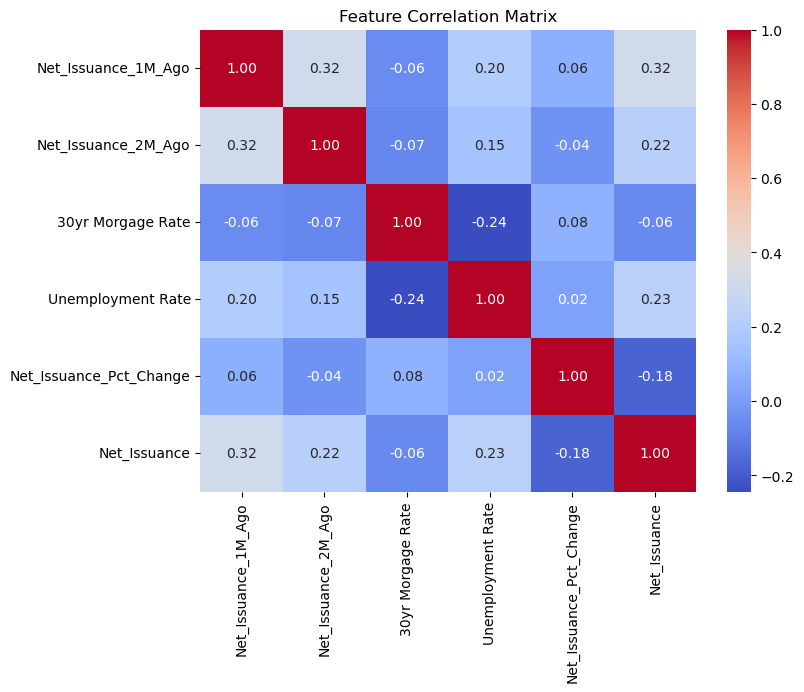

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()
